# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Data Processing

In [4]:
# Load the dataset
df = pd.read_csv("./TCS.csv") # df stands for dataframe

In [5]:
# Preprocessing the Data
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]  # Selecting only useful columns
df['Date'] = pd.to_datetime(df['Date']) # formatting the date
df = df.sort_values(by='Date') # sorting the data according to the date

# Splitting the Data

In [6]:
# Defining the Target Variable
df['Next_Close'] = df['Close'].shift(-1)
df.dropna(inplace=True)

# Features and target
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Next_Close']

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Training

In [7]:
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Making the Predictions by using Trained Model

In [8]:
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Defining the Evaluation Function

In [10]:
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"📌 {model_name} Performance:")
    print(f"  - Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  - Mean Squared Error (MSE): {mse:.2f}")
    print(f"  - Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"  - R² Score: {r2:.4f}\n")

    return mae, mse, rmse, r2

# Evaluate all the Trained Models

In [11]:
mae_lr, mse_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr, "Linear Regression")
mae_rf, mse_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")
mae_xgb, mse_xgb, rmse_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb, "XGBoost")

📌 Linear Regression Performance:
  - Mean Absolute Error (MAE): 21.69
  - Mean Squared Error (MSE): 1143.74
  - Root Mean Squared Error (RMSE): 33.82
  - R² Score: 0.9979

📌 Random Forest Performance:
  - Mean Absolute Error (MAE): 25.16
  - Mean Squared Error (MSE): 1606.37
  - Root Mean Squared Error (RMSE): 40.08
  - R² Score: 0.9970

📌 XGBoost Performance:
  - Mean Absolute Error (MAE): 25.98
  - Mean Squared Error (MSE): 1588.65
  - Root Mean Squared Error (RMSE): 39.86
  - R² Score: 0.9971



# Grouping the Results for Visualization

In [12]:
models = ["Linear Regression", "Random Forest", "XGBoost"]
maes = [mae_lr, mae_rf, mae_xgb]
mses = [mse_lr, mse_rf, mse_xgb]
rmses = [rmse_lr, rmse_rf, rmse_xgb]
r2s = [r2_lr, r2_rf, r2_xgb]

# Visualization

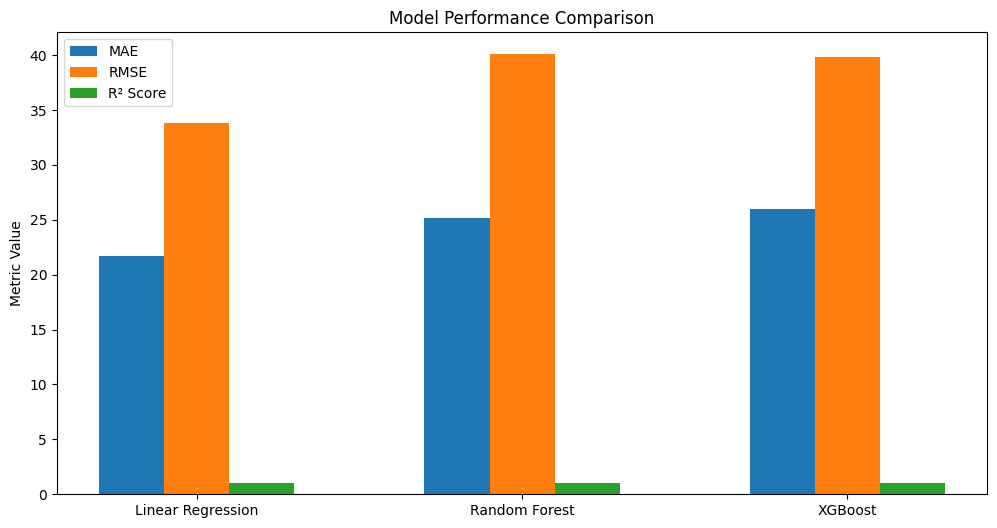

In [13]:
plt.figure(figsize=(12, 6))
x_axis = np.arange(len(models))

plt.bar(x_axis - 0.2, maes, width=0.2, label="MAE")
plt.bar(x_axis, rmses, width=0.2, label="RMSE")
plt.bar(x_axis + 0.2, r2s, width=0.2, label="R² Score")

plt.xticks(x_axis, models)
plt.ylabel("Metric Value")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()

# Picking the best Trained Model

In [14]:
best_model = max(zip(models, r2s), key=lambda x: x[1])[0]
print(f"🏆 Best Performing Model: {best_model}")

# Select the best model's predictions for visualization
if best_model == "Linear Regression":
    best_predictions = y_pred_lr
elif best_model == "Random Forest":
    best_predictions = y_pred_rf
else:
    best_predictions = y_pred_xgb

🏆 Best Performing Model: Linear Regression


# Linear Regression Visualization

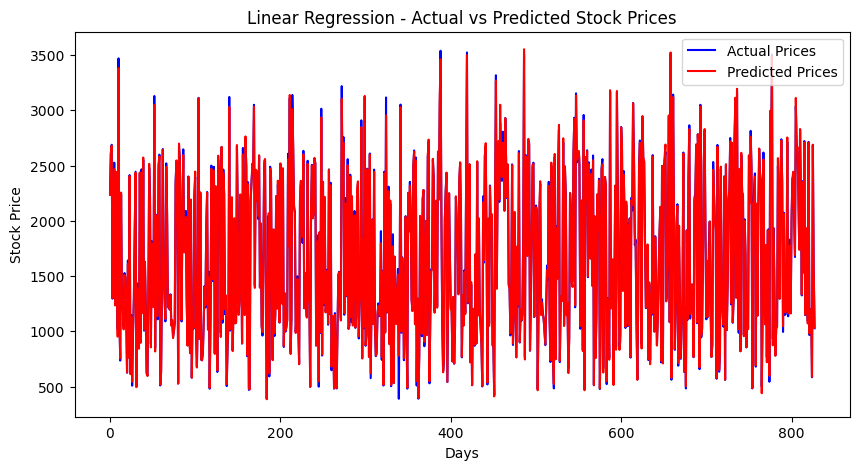

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual Prices", color='blue')
plt.plot(best_predictions, label="Predicted Prices", color='red')
plt.legend()
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title(f"{best_model} - Actual vs Predicted Stock Prices")
plt.show()